In [1]:
# -*- coding: utf-8 -*-
#read .shp
import shapefile
sf2 = shapefile.Reader('钻孔/钻孔1_Project.shp')
sf = shapefile.Reader('范围/范围.shp')

In [9]:
#caculate the maxmin and dvalue of shape
import matplotlib.pyplot as plt
shapes = sf.shapes()
for shp in range(len(shapes)):
    l = []
    shap = shapes[shp]
    for i in range(len(shap.points)):
    #   print (shap.points[i])
        l.append(shap.points[i])
        xvalue = [x[0] for x in l]
        yvalue = [x[1] for x in l]
    #     plt.scatter(xvalue, yvalue, c = 'k', s = 1, marker='o')
    #     plt.show()
xx_max = max(xvalue)
xx_min = min(xvalue)
yy_max = max(yvalue)
yy_min = min(yvalue)
dxx = (xx_max - xx_min)/1000
dyy = (yy_max - yy_min)/1000
print(xx_max, xx_min, yy_max, yy_min)
print(dxx, dyy)

113.5650024369386 113.14209055235386 23.325469455536062 22.980678571030143
0.00042291188458473526 0.0003447908845059189


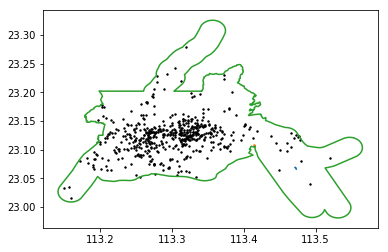

In [10]:
#show data and working area
import matplotlib.pyplot as plt
listx=[]
for sr in sf2.shapeRecords():
    for xNew,yNew in sr.shape.points:
        listx.append(sr.shape.points[0])
plt.scatter([x[0] for x in listx], [x[1] for x in listx], c = 'k', s = 2, marker='o')
for shape in sf.shapeRecords():
    x = [i[0] for i in shape.shape.points[:]]
    y = [i[1] for i in shape.shape.points[:]]
    plt.plot(x,y)
# figure_fig = plt.gcf()  # 'get current figure'
# figure_fig.savefig('test.eps', format='eps', dpi=1000)
plt.show()

In [11]:
#store x,y of point in list
data = []
for sr in sf2.shapeRecords():
    tmp = []
    for xNew,yNew in sr.shape.points:
        tmp = sr.shape.points[0]
        data.append(tmp)

cat = []
recds = sf2.records()
for i in recds:
    if i[3] == b'\xc8\xed\xc8\xf5\xcd\xc1':
        cat.append(0)
    elif i[3] == b'\xd6\xd0\xc8\xed\xcd\xc1':
        cat.append(1)
    else:
        cat.append(2)

In [13]:
#change categories into int and store into list
for index in range(len(cat)):
    data[index].append(cat[index])

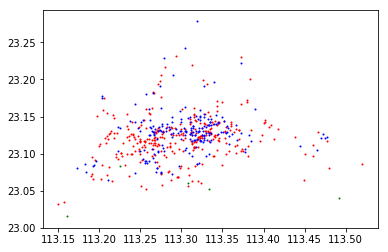

In [14]:
#show data
A, B, C = [], [], []
for index in data:
    if int(index[2]) == 1:
        B.append([index[0], index[1]])
    if int(index[2]) == 2:
        C.append([index[0], index[1]])
    if int(index[2]) == 0:
        A.append([index[0], index[1]])

plt.scatter([nums[0] for nums in A], [nums[1] for nums in A], c = 'g', s = 1)
plt.scatter([nums[0] for nums in B], [nums[1] for nums in B], c = 'r', s = 1)
plt.scatter([nums[0] for nums in C], [nums[1] for nums in C], c = 'b', s = 1)
plt.show()

In [61]:
#save data in .csv
import csv
with open('drill.csv', 'w', newline="") as myFile:
    myWriter = csv.writer(myFile)
    for str_line in data:
        myWriter.writerow(str_line)

In [62]:
#create test data
import csv
testdata = []
for i in range(1000):
    for j in range(1000):
        testdata.append([xx_min + j*dxx, yy_min + i*dyy])
with open('test.csv', 'w', newline="") as myFile:
    myWriter = csv.writer(myFile)
    for str_line in testdata:
#         tmp = []
#         tmp.append(str_line)
        myWriter.writerow(str_line)

In [15]:
xtmp = []
ytmp = []
for i in range(1000):
    xtmp.append(xx_min + i*dxx)
for j in range(1000):
    ytmp.append(yy_min + j*dyy)
xtmp = np.array(xtmp)
ytmp = np.array(ytmp)

In [ ]:
#knn

In [30]:
#zz
import csv
label = []
point2color = {}
with open('result.csv') as file:
    lines = csv.reader(file)
    for line in lines:
        label.append(line)
xy = []
with open('test.csv') as file:
    lines = csv.reader(file)
    for line in lines:
        xy.append(line)
color_dir = {}
# color_dir['1.0'] = 'indianred'
# color_dir['2.0'] = 'royalblue'
color_dir['1'] = 10
color_dir['2'] = 20

for index in range(len(label)):
    point2color[xy[index][0][:8] + "+" + xy[index][1][:7]] = color_dir[label[index][0]]

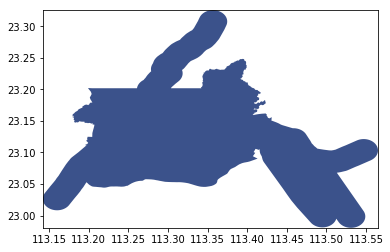

In [31]:
#generate the area color
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
import csv
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

shape_rec = sf.shapeRecords()[-1]
vertices = []
codes = []
pts = shape_rec.shape.points
prt = list(shape_rec.shape.parts) + [len(pts)]
for i in range(len(prt) - 1):
    for j in range(prt[i], prt[i+1]):
        vertices.append((pts[j][0], pts[j][1]))
    codes += [Path.MOVETO]
    codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
    codes += [Path.CLOSEPOLY]
clip = Path(vertices, codes)
clip = PathPatch(clip, transform=ax.transData, edgecolor='k')

# xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 1000), np.linspace(yy_min, yy_max, 1000), copy=False)
xx, yy = np.meshgrid(xtmp, ytmp, copy=False)
zz = []
for i in range(len(xx)):
    tmp = []
    for j in range(len(yy)):
        tmp.append(point2color[str(xx[i][j])[:8] + "+" +str(yy[i][j])[0:7]])
    zz.append(tmp)

cont = plt.contourf(xx, yy, zz, 1)
#brg plt.cm.hot
    
for col in cont.collections:
    col.set_clip_path(clip)

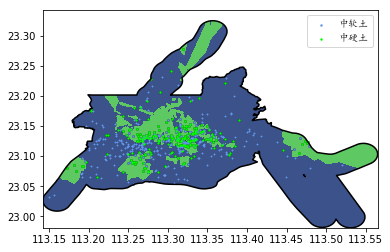

In [61]:
#generate the plots and lines
import matplotlib
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
import csv

def showResultData():
    fig = plt.figure()
    ax = fig.add_subplot(111)

    shape_rec = sf.shapeRecords()[-1]
    vertices = []
    codes = []
    pts = shape_rec.shape.points
    prt = list(shape_rec.shape.parts) + [len(pts)]
    for i in range(len(prt) - 1):
        for j in range(prt[i], prt[i+1]):
            vertices.append((pts[j][0], pts[j][1]))
        codes += [Path.MOVETO]
        codes += [Path.LINETO] * (prt[i+1] - prt[i] -2)
        codes += [Path.CLOSEPOLY]
    clip = Path(vertices, codes)
    clip = PathPatch(clip, transform=ax.transData, edgecolor='k')

    # xx, yy = np.meshgrid(np.linspace(xx_min, xx_max, 1000), np.linspace(yy_min, yy_max, 1000), copy=False)
    xx, yy = np.meshgrid(xtmp, ytmp, copy=False)
    zz = []
    for i in range(len(xx)):
        tmp = []
        for j in range(len(yy)):
            tmp.append(point2color[str(xx[i][j])[:8] + "+" +str(yy[i][j])[0:7]])
        zz.append(tmp)

    cont = plt.contourf(xx, yy, zz, 1)
    #brg plt.cm.hot
    
    for col in cont.collections:
        col.set_clip_path(clip)
    
    l = []
    with open('drill.csv') as file:
        lines = csv.reader(file)
        for line in lines:
            l.append(line)
    A, B, C = [], [], []
    for index in l[1:]:
        if int(float(index[2])) == 1:
            B.append([float(index[0]), float(index[1])])
        if int(float(index[2])) == 2:
            C.append([float(index[0]), float(index[1])])
        if int(float(index[2])) == 0:
            A.append([float(index[0]), float(index[1])])

#     plt.scatter([nums[0] for nums in A], [nums[1] for nums in A], c = 'k', s = 2, marker='o')
    plt.scatter([nums[0] for nums in B], [nums[1] for nums in B], c = 'k', s = 2, marker='o')
    plt.scatter([nums[0] for nums in C], [nums[1] for nums in C], c = 'k', s = 2, marker='o')

#     l1 = plt.scatter([nums[0] for nums in A], [nums[1] for nums in A], c = 'r', s = 1, marker='o')
    l2 = plt.scatter([nums[0] for nums in B], [nums[1] for nums in B], c = 'cornflowerblue', s = 2, marker='o')
    l3 = plt.scatter([nums[0] for nums in C], [nums[1] for nums in C], c = 'lime', s = 2, marker='o')
 
    chinese =matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simkai.ttf')
    plt.legend(handles =[l2,l3] , labels=['中软土','中硬土'], loc = 'best', prop=chinese)

#     sf = shapefile.Reader('./范围/范围.shp')
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x,y,c='k')
    figure_fig = plt.gcf()  # 'get current figure'
    figure_fig.savefig('./result/result.eps', format='eps', dpi=1000)
    figure_fig.savefig('./result/result.jpg', format='jpg', dpi=1000)
    plt.show()
showResultData()

In [19]:
#save result
figure_fig = plt.gcf()  # 'get current figure'
figure_fig.savefig('./result/result.eps', format='eps', dpi=1000)
figure_fig.savefig('./result/result.jpg', format='jpg', dpi=1000)
plt.show()

<Figure size 432x288 with 0 Axes>